In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mark=pd.read_excel('time.xlsx')
data=pd.read_excel('data1.xls')
data.head()

,Wav Time,B5-01657-P01-CH0,Frame,State,Q0,Qx,Qy,Qz,Tx,Ty,...,Frame.6,State.6,Q0.6,Qx.6,Qy.6,Qz.6,Tx.6,Ty.6,Tz.6,
0,0.009992,B5-01657-P01-CH0,3049072,OK,0.566167,-0.634326,-0.526390,0,-107.555,96.580,...,3049072,OK,0.581277,0.644985,0.244514,0.431653,-3.767,86.656,-263.011,
1,0.019984,B5-01657-P01-CH0,3049080,OK,0.565362,-0.635815,-0.525457,0,-107.181,96.441,...,3049080,OK,0.581890,0.644466,0.244177,0.431793,-3.753,86.521,-262.998,
2,0.029976,B5-01657-P01-CH0,3049088,OK,0.564820,-0.636543,-0.525159,0,-107.053,96.341,...,3049088,OK,0.580945,0.645340,0.244976,0.431307,-3.710,86.425,-262.979,
3,0.039968,B5-01657-P01-CH0,3049096,OK,0.564889,-0.636362,-0.525304,0,-107.129,96.236,...,3049096,OK,0.580288,0.645924,0.245262,0.431155,-3.564,86.411,-262.949,
4,0.049960,B5-01657-P01-CH0,3049104,OK,0.564384,-0.636350,-0.525860,0,-107.109,96.047,...,3049104,OK,0.579762,0.646404,0.245835,0.430818,-3.552,86.292,-262.936,


In [25]:
mark.head(15)

,发音人,音的名称,起始时间,结束时间,稳定帧
0,1,啊1-1,0.93,1.32,1.08
1,1,啊1-2,1.67,2.06,1.69
2,1,啊1-3,2.40,2.82,2.76
3,1,啊2-1,3.40,3.77,3.69
4,1,啊2-2,4.14,4.51,4.19
5,1,啊2-3,4.89,5.31,4.95
6,1,啊3-1,5.94,6.30,6.15
7,1,啊3-2,6.68,7.02,7.00
8,1,啊3-3,7.37,7.68,7.52
9,1,啊4-1,8.46,8.74,8.71


In [5]:
mark.shape
#data_refer=data.iloc[:,68:71]#取第七组参考点
#data_refer.head()

(96, 5)

In [6]:
data_=data.iloc[:,38:41]#取第4组TxTyTz
data_.head()

,Tx.3,Ty.3,Tz.3
0,-82.469,68.142,-263.398
1,-82.378,68.373,-263.477
2,-82.233,68.508,-263.401
3,-82.155,68.512,-263.195
4,-82.146,68.358,-262.949


In [7]:
markcol_start=mark['起始时间']*100#取第多少行数据
markcol_end=mark['结束时间']*100#取第多少行数据

In [8]:
markcol_start=np.array(markcol_start)
markcol_end=np.array(markcol_end)
markcol_start=markcol_start.astype(np.int32)
markcol_end=markcol_end.astype(np.int32)#时间转行数

In [9]:
for i in range(96):
     locals()['data'+str(i)] = data_.iloc[markcol_start[i]:markcol_end[i],:]

In [10]:
dataA=[]
dataE=[]
dataU=[]
dataI=[]
dataYU=[]
dataZHI=[]
dataZI=[]

In [ ]:
# 以下是发音字典类型标准文件的结构，
pronounce_dict = {
    "啊": {
        "one": "",
        "two": "",
        "three": "",
        "four": ""
    },
    "鹅": {
        "one": "",
        "two": "",
        "three": "",
        "four": ""
    },
    "乌": {
        "one": "",
        "two": "",
        "three": "",
        "four": ""
    },
    "衣": {
        "one": "",
        "two": "",
        "three": "",
        "four": ""
    },
    "于": {
        "one": "",
        "two": "",
        "three": "",
        "four": ""
    },
    "知": {
        "one": "",
        "two": "",
        "three": "",
        "four": ""
    },
    "资": {
        "one": "",
        "two": "",
        "three": "",
        "four": ""
    },
}

In [11]:
for i in range(12):
    dataA.append(locals()['data'+str(i)])
for i in range(12):
    dataE.append(locals()['data'+str(i+12)])
for i in range(12):
    dataU.append(locals()['data'+str(i+24)])
for i in range(12):
    dataI.append(locals()['data'+str(i+36)])
for i in range(12):
    dataYU.append(locals()['data'+str(i+48)])
for i in range(12):
    dataZHI.append(locals()['data'+str(i+60)])
for i in range(12):
    dataZI.append(locals()['data'+str(i+72)])

In [12]:
def displacement(x,label):
    maxinmax=[]
    mininmin=[]
    for i in range(12):
        print("12段每行最大数据",x[i][label].max())
        maxinmax.append(x[i][label].max())
        mininmin.append(x[i][label].min())
    print("max:",max(maxinmax))
    print("min:",min(mininmin))
    len=max(maxinmax)-min(mininmin)
    print(len)
    return len

In [13]:
def ThisMax(x,label):
    maxinmax=[]
    mininmin=[]
    for i in range(12):
        print("12段每行最大数据",x[i][label].max())
        maxinmax.append(x[i][label].max())
        mininmin.append(x[i][label].min())
    return max(maxinmax)
def ThisMin(x,label):
    maxinmax=[]
    mininmin=[]
    for i in range(12):
        print("12段每行最大数据",x[i][label].max())
        maxinmax.append(x[i][label].max())
        mininmin.append(x[i][label].min())
    return min(maxinmax)

In [14]:
chineseList=[dataA,dataE,dataU,dataI,dataYU,dataZHI,dataZI]

In [15]:
chineseListName=['dataA','dataE','dataU','dataI','dataYU','dataZHI','dataZI']

In [16]:
#最值求散点
xlistmax=[]
xlistmin=[]
ylistmax=[]
ylistmin=[]
for i in range(7): 
    print(chineseListName[i])
    #xlist.append(displacement(chineseList[i],'Tx.3'))
    xlistmax.append(ThisMax(chineseList[i],'Tx.3'))
    xlistmin.append(ThisMin(chineseList[i],'Tx.3'))
    ylistmax.append(ThisMax(chineseList[i],'Ty.3'))
    ylistmin.append(ThisMin(chineseList[i],'Ty.3'))

dataA
12段每行最大数据 -87.26
12段每行最大数据 -87.527
12段每行最大数据 -86.678
12段每行最大数据 -88.61
12段每行最大数据 -89.191
12段每行最大数据 -89.513
12段每行最大数据 -88.444
12段每行最大数据 -88.367
12段每行最大数据 -84.673
12段每行最大数据 -88.179
12段每行最大数据 -89.85
12段每行最大数据 -90.583
12段每行最大数据 -87.26
12段每行最大数据 -87.527
12段每行最大数据 -86.678
12段每行最大数据 -88.61
12段每行最大数据 -89.191
12段每行最大数据 -89.513
12段每行最大数据 -88.444
12段每行最大数据 -88.367
12段每行最大数据 -84.673
12段每行最大数据 -88.179
12段每行最大数据 -89.85
12段每行最大数据 -90.583
12段每行最大数据 71.547
12段每行最大数据 69.312
12段每行最大数据 68.573
12段每行最大数据 64.798
12段每行最大数据 63.241
12段每行最大数据 64.09
12段每行最大数据 63.877
12段每行最大数据 61.989
12段每行最大数据 62.113
12段每行最大数据 61.898
12段每行最大数据 62.321
12段每行最大数据 63.737
12段每行最大数据 71.547
12段每行最大数据 69.312
12段每行最大数据 68.573
12段每行最大数据 64.798
12段每行最大数据 63.241
12段每行最大数据 64.09
12段每行最大数据 63.877
12段每行最大数据 61.989
12段每行最大数据 62.113
12段每行最大数据 61.898
12段每行最大数据 62.321
12段每行最大数据 63.737
dataE
12段每行最大数据 -85.962
12段每行最大数据 -87.128
12段每行最大数据 -87.327
12段每行最大数据 -87.223
12段每行最大数据 -83.974
12段每行最大数据 -84.604
12段每行最大数据 -87.468
12段每行最大数据 -85.049
12段每行最大数据 -8

In [17]:
xlist=[]
for i in range(7): 
    print(chineseListName[i])
    xlist.append(displacement(chineseList[i],'Tx.3'))
ylist=[]
for i in range(7): 
    print(chineseListName[i])
    ylist.append(displacement(chineseList[i],'Ty.3'))


dataA
12段每行最大数据 -87.26
12段每行最大数据 -87.527
12段每行最大数据 -86.678
12段每行最大数据 -88.61
12段每行最大数据 -89.191
12段每行最大数据 -89.513
12段每行最大数据 -88.444
12段每行最大数据 -88.367
12段每行最大数据 -84.673
12段每行最大数据 -88.179
12段每行最大数据 -89.85
12段每行最大数据 -90.583
max: -84.673
min: -93.761
9.087999999999994
dataE
12段每行最大数据 -85.962
12段每行最大数据 -87.128
12段每行最大数据 -87.327
12段每行最大数据 -87.223
12段每行最大数据 -83.974
12段每行最大数据 -84.604
12段每行最大数据 -87.468
12段每行最大数据 -85.049
12段每行最大数据 -86.901
12段每行最大数据 -88.422
12段每行最大数据 -89.597
12段每行最大数据 -88.899
max: -83.974
min: -92.602
8.628
dataU
12段每行最大数据 -97.925
12段每行最大数据 -95.956
12段每行最大数据 -96.077
12段每行最大数据 -96.432
12段每行最大数据 -93.247
12段每行最大数据 -95.531
12段每行最大数据 -93.919
12段每行最大数据 -93.234
12段每行最大数据 -94.048
12段每行最大数据 -93.716
12段每行最大数据 -98.609
12段每行最大数据 -98.966
max: -93.234
min: -100.57
7.3359999999999985
dataI
12段每行最大数据 -96.84
12段每行最大数据 -89.88
12段每行最大数据 -90.657
12段每行最大数据 -87.229
12段每行最大数据 -87.664
12段每行最大数据 -86.41
12段每行最大数据 -87.948
12段每行最大数据 -87.388
12段每行最大数据 -87.496
12段每行最大数据 -89.152
12段每行最大数据 -91.669
12段每行最大数据 -90.4

In [18]:
#归一化
arr = np.asarray(xlistmax)
X=[]
for x in arr:
    x = float(x - np.min(arr))/(np.max(arr)- np.min(arr))
    X.append(x)
print(X)
arr = np.asarray(ylistmax)
Y=[]
for y in arr:
    y = float(y - np.min(arr))/(np.max(arr)- np.min(arr))
    Y.append(y)
print(Y)

[0.963935610360128, 1.0, 0.5222371272314521, 0.874316376018987, 0.5504591889381901, 0.0, 0.36446187183985124]
[0.1475615887380591, 0.16232133879192687, 0.0, 0.8143000790059611, 0.7241255476549594, 1.0, 0.9304747540041656]


/Users/sanmu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Users/sanmu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/Users/sanmu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/sanmu/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  al

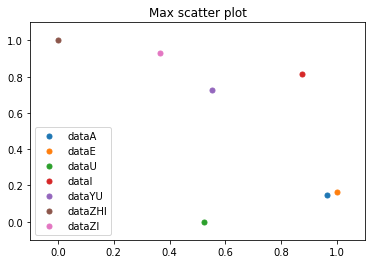

In [19]:
plt.xlim(xmax=1.1,xmin=-0.1)
plt.ylim(ymax=1.1,ymin=-0.1)
# clist=['c', 'b', 'g', 'r', 'm', 'y', 'k', 'w']
for i in range(7):
    plt.scatter(X[i],Y[i],marker = '.',label = chineseListName[i],s = 100,cmap='coolwarm', ) 
plt.legend(loc='lower left')
plt.title("Max scatter plot")
plt.show()

In [20]:
#归一化
arr = np.asarray(xlistmin)
X=[]
for x in arr:
    x = float(x - np.min(arr))/(np.max(arr)- np.min(arr))
    X.append(x)
print(X)
arr = np.asarray(ylistmin)
Y=[]
for y in arr:
    y = float(y - np.min(arr))/(np.max(arr)- np.min(arr))
    Y.append(y)
print(Y)

[0.9467631337400786, 1.0, 0.4941417850008099, 0.6089304033259538, 0.18238756006695103, 0.0, 0.2719075643863723]
[0.2131583211797117, 0.37309998379517095, 0.0, 0.8326689353427322, 0.6468643655809432, 0.8501377410468322, 1.0]


In [21]:
# from bokeh.plotting import figure,show
# p =figure(plot_width=400,plot_height=400)
# p.scatter(X,Y,size=20,marker="circle",color="navy",alpha=0.5)
# show(p)
#另一种方式的散点图

In [22]:
z = [1,2,3,4,5,6,7]

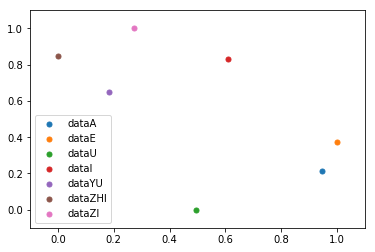

In [23]:
plt.xlim(xmax=1.1,xmin=-0.1)
plt.ylim(ymax=1.1,ymin=-0.1)
# clist=['c', 'b', 'g', 'r', 'm', 'y', 'k', 'w']
for i in range(7):
    plt.scatter(X[i],Y[i],marker = '.',label = chineseListName[i],s = 100,cmap='coolwarm', ) 
plt.legend(loc='lower left')     
plt.show()

In [24]:
# plt.scatter(X[0],Y[0],marker = '*',
#             label = 'dataA',  #数据标签名称
#             s = 50,           #数据点大小
#     #                 cmap='coolwarm',          #数据点填充颜色
#     #                 edgecolors='m'
#             )